SVM Accuracy: 12.40%

Classification Report:
               precision    recall  f1-score   support

           1       0.14      0.18      0.15       179
           2       0.15      0.28      0.19       189
           3       0.14      0.09      0.11       193
           4       0.16      0.12      0.14       179
           5       0.11      0.03      0.05       156
           6       0.13      0.24      0.17       172
           7       0.07      0.03      0.04       172
           8       0.10      0.10      0.10       181
           9       0.15      0.12      0.14       192
          10       0.09      0.15      0.11       158
          11       0.11      0.09      0.10       186
          12       0.07      0.01      0.02       147

    accuracy                           0.12      2104
   macro avg       0.12      0.12      0.11      2104
weighted avg       0.12      0.12      0.11      2104


Confusion Matrix:
 [[32 29  6 10  3 22  6 11  9 38 11  2]
 [18 52  6 25  3 24  6 11 11

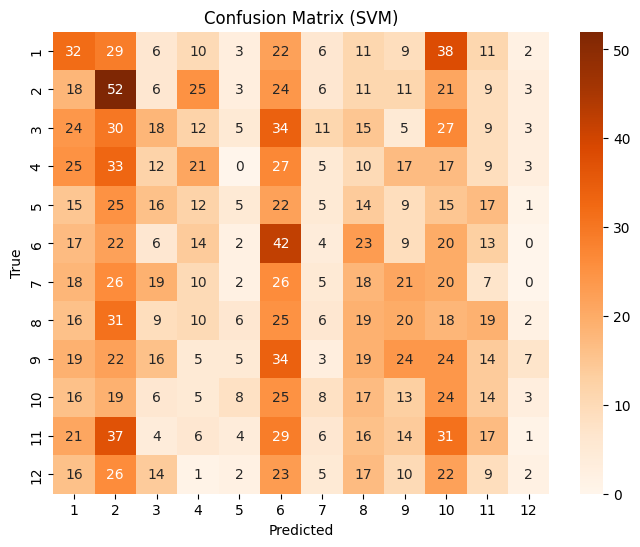

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('LDA.csv') 

# Step 2: Define features (X) and target labels (y)
X = data.drop('target', axis=1)  
y = data['target']  

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply LDA to reduce dimensionality
lda = LinearDiscriminantAnalysis(n_components=None)  # Classes - 1 components by default
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 5: Train SVM Classifier
svm = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly'
svm.fit(X_train_lda, y_train)

# Step 6: Predict on the test set
y_pred_svm = svm.predict(X_test_lda)

# Step 7: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100  # Convert to percentage
print(f"SVM Accuracy: {accuracy_svm:.2f}%")  # Display accuracy

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges', 
            xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()
